In [5]:
#mypulpは混合整数問題をモデル化するためのモジュール pulp を商用パッケージGurobiと同じ文法で記述するためのラッパーモジュール
import pandas as pd
import numpy as np
import os
import intvalpy
from mypulp import Model, quicksum, GRB, multidict

## 線形最適化問題
線形最適化問題の一般系は以下のように記載できる

$$
mininize : c^Tx \\
s.t. : Ax\leqq b
$$

In [6]:
model = Model("lol") # モデル名を設定している。ここはなんでも良い

x1 = model.addVar(name="x1") # 変数を設定する
x2 = model.addVar(name="x2") # 変数を設定する

model.update() #gurobiでは必要だが、pulpでは不要

model.addConstr(2 * x1 + x2 <= 60) # 制約条件を設定する
model.addConstr(x1 + 2 * x2 <= 60) # 制約条件を設定する
model.setObjective(15 * x1 + 18 * x2, GRB.MAXIMIZE) #

model.optimize()

if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Value=", model.ObjVal)
    for v in model.getVars():
        print(v.VarName, v.X)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/penguin/.conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8d5425eb8219434095b19c53b45d2063-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/8d5425eb8219434095b19c53b45d2063-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 20 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 33 (2)
0  Obj -0 Dual inf 33 (2)
2  Obj 660
Optimal - objective value 660
Optimal objective 660 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Opt. Value= 660.0
x1 20.0
x2 20.0


array([[20., 20.],
       [30.,  0.],
       [ 0.,  0.],
       [ 0., 30.]])

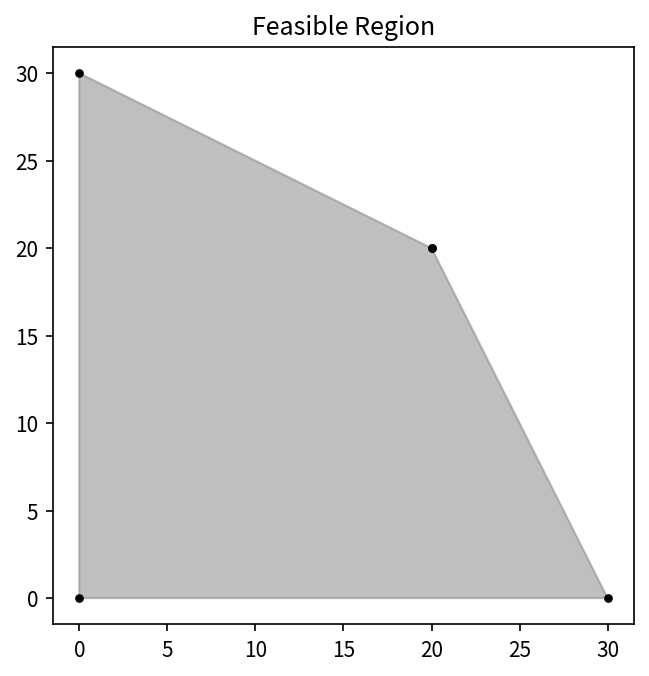

In [8]:
A = np.array([[-2, -1],
              [-1, -2],
              [1, 0],
              [0,1]])
b = np.array([-60, -60, 0, 0])
intvalpy.lineqs(A, b, title="Feasible Region", color="gray", alpha=.5, s=10, size=(5,5), save=False, show=True)

In [15]:
# mypulp は線形最適化にのみ対応しているので、この2次推最適化問題は解けない
model = Model()
x = model.addVar(name="x")
y = model.addVar(name="y")
z = model.addVar(name="z")

# model.update()

model.addConstr(x**2+y**2 <= z**2)
model.addConstr(2*x+3*y+4*z <= 10)

model.setObjective(2*x + 2*y +z, GRB.MAXIMIZE)

model.optimize()

if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Val.=", model.ObjVal)
    print("(x,y,z)=",(x.X, y.X, z.X))

TypeError: unsupported operand type(s) for ** or pow(): 'Variable' and 'int'

In [16]:
## 整数最適化問題
model = Model()
x = model.addVar(vtype="I", name="x")
y = model.addVar(vtype="I", name="y")
z = model.addVar(vtype="I", name="z")

model.addConstr(x+y+z==32)
model.addConstr(2*x+4*y+8*z==80)

model.setObjective(y+z, GRB.MINIMIZE)

model.optimize()

if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Val.=", model.ObjVal)
    print("(x,y,z)=",(x.X, y.X, z.X))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/penguin/.conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/61543b4e5b90466a93176822fc96b754-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/61543b4e5b90466a93176822fc96b754-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 22 RHS
At line 25 BOUNDS
At line 29 ENDATA
Problem MODEL has 2 rows, 3 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2.66667 - 0.00 seconds
Cgl0003I 0 fixed, 2 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 4 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 2 rows, 3 columns (3 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to

## 実行不可能と非有界
一般的に最適化問題は常に最適解を持つとは限らない。特に現実的な問題を取り扱う場合には、制約条件が厳しすぎて解が存在しない場合もある。

また、目的関数が無限に良くなってしまう場合を非有界と呼ぶ。

実行不可能の場合、

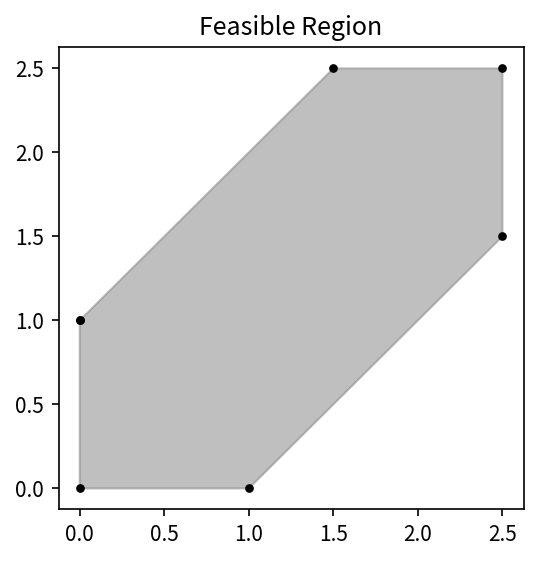

In [18]:
A = np.array([[1, -1],
              [-1, 1],
              [1, 0],
              [0, 1]])
b = np.array([-1, -1, 0, 0])

intvalpy.lineqs(A, b, title='Feasible Region', color='gray', alpha=0.5, s=10, size=(4,4), save=False, show=True);

In [20]:
model = Model()
x ={}
for i in range(1,3):
    x[i] = model.addVar(vtype="C", name= f"x({i})")
# model.update()
# infeasible
model.addConstr(x[1]-x[2]<=-1)
model.addConstr(-x[1]+x[2]<=-1)
# unbounded
# model.addConstr(-x[1]+x[2]>=-1)
# model.addConstr(x[1]-x[2]>=-1)
model.setObjective(x[1]+x[2], GRB.MAXIMIZE)
model.optimize()
print("Status=", model.status)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/penguin/.conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/fabf5b645393463298b6e85baae48131-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/fabf5b645393463298b6e85baae48131-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 20 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve thinks problem is infeasible AND unbounded???
Analysis indicates model infeasible or unbounded
0  Obj -0 Primal inf 1.9999998 (2) Dual inf 1.9999998 (2)
1  Obj 2e+10 Primal inf 1.9999999 (1)
1  Obj 2e+10 Primal inf 1.9999999 (1)
1  Obj 1e+11 Primal inf 1.9999999 (1)
1  Obj 5e+11 Primal inf 1.9999999 (1)
1  Obj 2.5e+12 Primal inf 1.9999999 (1)
1  Obj 1.25e+13 Primal inf 1.9999999 (1)
Primal infeas

In [21]:
F, c, n = multidict(
    {
        "CQPounder": [
            360,
            {
                "Cal": 556,
                "Carbo": 39,
                "Protein": 30,
                "VitA": 147,
                "VitC": 10,
                "Calc": 221,
                "Iron": 2.4,
            },
        ],
        "Big M": [
            320,
            {
                "Cal": 556,
                "Carbo": 46,
                "Protein": 26,
                "VitA": 97,
                "VitC": 9,
                "Calc": 142,
                "Iron": 2.4,
            },
        ],
        "FFilet": [
            270,
            {
                "Cal": 356,
                "Carbo": 42,
                "Protein": 14,
                "VitA": 28,
                "VitC": 1,
                "Calc": 76,
                "Iron": 0.7,
            },
        ],
        "Chicken": [
            290,
            {
                "Cal": 431,
                "Carbo": 45,
                "Protein": 20,
                "VitA": 9,
                "VitC": 2,
                "Calc": 37,
                "Iron": 0.9,
            },
        ],
        "Fries": [
            190,
            {
                "Cal": 249,
                "Carbo": 30,
                "Protein": 3,
                "VitA": 0,
                "VitC": 5,
                "Calc": 7,
                "Iron": 0.6,
            },
        ],
        "Milk": [
            170,
            {
                "Cal": 138,
                "Carbo": 10,
                "Protein": 7,
                "VitA": 80,
                "VitC": 2,
                "Calc": 227,
                "Iron": 0,
            },
        ],
        "VegJuice": [
            100,
            {
                "Cal": 69,
                "Carbo": 17,
                "Protein": 1,
                "VitA": 750,
                "VitC": 2,
                "Calc": 18,
                "Iron": 0,
            },
        ],
    }
)
N, a, b = multidict(
    {
        "Cal": [2000, 3000],
        "Carbo": [300, 375],
        "Protein": [50, 60],
        "VitA": [500, 750],
        "VitC": [85, 100],
        "Calc": [660, 900],
        "Iron": [6.0, 7.5],
    }
)


In [22]:
F

['CQPounder', 'Big M', 'FFilet', 'Chicken', 'Fries', 'Milk', 'VegJuice']

In [23]:
# 栄養問題を解いてみる
# 今回の設定問題は実行不可であるが、制約を許容する形で関数を与えることで解くことができる
model = Model(name="modern diet")
x,s,d = {}, {}, {}

for j in F:
    x[j] = model.addVar(vtype="C", name=f"x({j})")
    for i in N:
        s[i] = model.addVar(vtype="C", name=f"surplus({i})")
        d[i] = model.addVar(vtype="C", name=f"deficit({i})")

for i in N:
    model.addConstr(quicksum(n[j][i] * x[j] for j in F) >= a[i] - d[i], f"NutrLB({i})")
    model.addConstr(quicksum(n[j][i] * x[j] for j in F) <= b[i] + s[i], f"NutrUB({i})")

model.setObjective(
    quicksum(c[j] * x[j] for j in F) + quicksum(9999 * d[i] + 9999 * s[i] for i in N),
    GRB.MINIMIZE
)
model.optimize()
if model.Status == GRB.Status.OPTIMAL:
    print("Opt. Val.=", model.ObjVal)
    for i in N:
        if x[j].X > 0:
            print(j, x[j].X)

    for i in N:
        if d[i].X > 0:
            print(f"deficit of {i} = {d[i].X}")
        if s[i].X > 0:
            print(f"surplus of {i} = {s[i].X}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/penguin/.conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/dc2f65e75da74189b7e3ac52898b93bb-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/dc2f65e75da74189b7e3ac52898b93bb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 19 COLUMNS
At line 147 RHS
At line 162 BOUNDS
At line 184 ENDATA
Problem MODEL has 14 rows, 21 columns and 106 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 14 (0) rows, 21 (0) columns and 106 (0) elements
0  Obj 0 Primal inf 26.359683 (7)
9  Obj 265119.19
Optimal - objective value 265119.19
Optimal objective 265119.1876 - 9 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Opt. Val.= 265119.18554951996
VegJuice 0.72910549
VegJuice 0.72910549
VegJuic

/home/penguin/.conda/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
